In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
import re
import csv


# Reference the file where the CSV is located
it_data = "data_scientist_US.csv"

# Import the data into a Pandas DataFrame
it_data_df = pd.read_csv(it_data)
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [3]:
# Print one job description to ensure that the text is showing a job posting.
print(it_data_df['job_description'][1])

We have an immediate opening for a Sharp Data Scientist with a strong Mathematical/Statistical background to work on various initiatives in a Huge data environment. Will be looking at various formats of Data dealing with Billing Fraud Patterns using various software and modeling techniques. The candidate should have a minimum of 3 years of solid work experience in a professional organization/corporation using Python, SQL, Python libraries, Machine Learning Algorithms ( i.e. Decision Tree, Random Forest, Logistic Regression, etc.) should have strong Python skills. Additional experience with R Cloud would be a plus. Will be working with structured and unstructured data formats so any experience with Hive, and other Big Data technologies would be a plus. Should have strong communication skills and the ability to explain data findings to both Technical and Non- Technical audiences. We are NOT considering Recent College Grads- MUST have a minimum of 2-3 post Graduate experience working in a

In [5]:
# Identify if each job description contains the keyword string "Python" (a highly sought after programming language!)
p = 'Python'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Python"] = True
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,True
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,True
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True


In [20]:
# Count the amount value counts (vcs) for the newly created Python column
# This will indicate how many of the job descriptions included Python in their posting
python_vcs = float(it_data_df['Python'].value_counts())
python_vcs

7803.0

In [11]:
# Identify if each job description contains the keyword string "Excel", short for "Microsoft Excel"
# (Since there could be a variety in how this is included in the job posting,
# it was decided to use "Excel" as a way to cover the most amount of potential inclusions of this skill.)
p = 'Excel'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Excel"] = True
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,MS Excel,Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,True,NaN,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,True,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,NaN,NaN
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,True,NaN,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True


In [19]:
# Count the amount value counts (vcs) for the newly created "Excel" column
# This will indicate how many of the job descriptions included "Excel" in their posting
excel_vcs = float(it_data_df['Excel'].value_counts())
excel_vcs

2919.0

In [38]:
# Identify if each job description contains the keyword string "SQL"
p = 'SQL'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'SQL'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,contact_email,contact_phone_number,uniq_id,html_job_description,Python,MS Excel,Excel,Machine Learning,Tableau,SQL
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,NaN,NaN,True,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,True,NaN,NaN,True,NaN,True
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,True,NaN,NaN,NaN,NaN,True
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,NaN,445652a560a5441060857853cf267470,NaN,True,True,True,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,NaN,NaN,NaN,NaN,NaN
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,True,NaN,NaN,NaN,True,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN,True


In [39]:
# Count the amount value counts (vcs) for the newly created Python column
# This will indicate how many of the job descriptions included Python in their posting
sql_vcs = float(it_data_df['SQL'].value_counts())
sql_vcs

5743.0

In [43]:
# Identify if each job description contains the keyword string "Machine Learning" (another highly sought-out skill!)
p = 'Java'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'Java'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,contact_phone_number,uniq_id,html_job_description,Python,MS Excel,Excel,Machine Learning,Tableau,SQL,Java
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,NaN,NaN,True,True,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,741727428839ae7ada852eebef29b0fe,NaN,True,NaN,NaN,True,NaN,True,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,True,NaN,NaN,NaN,NaN,True,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,445652a560a5441060857853cf267470,NaN,True,True,True,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,NaN,NaN,NaN,NaN,NaN,NaN
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN,True,NaN
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,True,NaN,NaN,NaN,True,NaN,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN,True,NaN


In [44]:
# Count the amount value counts (vcs) for the newly created Python column
# This will indicate how many of the job descriptions included Python in their posting
java_vcs = float(it_data_df['Java'].value_counts())
java_vcs

2390.0

In [35]:
# Identify if each job description contains the keyword string "Machine Learning" (another highly sought-out skill!)
p = 'Machine Learning'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),'Machine Learning'] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,MS Excel,Excel,Machine Learning,Tableau
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,NaN,NaN,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,True,NaN,NaN,True,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,True,NaN,NaN,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,True,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,NaN,NaN,NaN,NaN
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,True,NaN,NaN,NaN,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN


In [36]:
# Count the amount value counts (vcs) for the newly created Python column
# This will indicate how many of the job descriptions included Python in their posting
ml_vcs = float(it_data_df['Machine Learning'].value_counts())
ml_vcs

2534.0

In [30]:
# Identify if each job description contains the keyword string "Tableau"
p = 'Tableau'
it_data_df.loc[it_data_df['job_description'].astype(str).str.contains(p),"Tableau"] = True
# Consistently printing the result following the function to check for the newly expected column
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,Python,MS Excel,Excel,Machine Learning,Tableau
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,True,NaN,NaN,NaN,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,True,NaN,NaN,True,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,True,NaN,NaN,NaN,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,True,True,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,NaN,NaN,NaN,NaN
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,True,NaN,NaN,NaN,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,True,True,NaN,NaN


In [31]:
# Count the amount value counts (vcs) for the newly created Python column
# This will indicate how many of the job descriptions included "Tableau" in their posting
tableau_vcs = float(it_data_df['Tableau'].value_counts())
tableau_vcs

2141.0

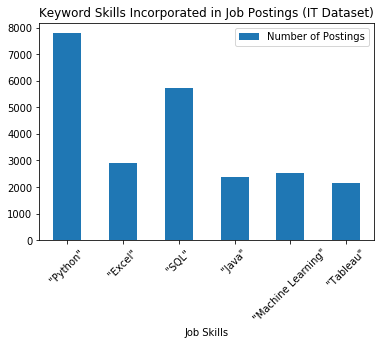

In [90]:
# Combine all the IT dataset skill keyword findings into a bar graph
df = pd.DataFrame({'Job Skills':['"Python"', '"Excel"', '"SQL"', '"Java"', '"Machine Learning"', '"Tableau"'], 
                   'Number of Postings':[python_vcs, excel_vcs, sql_vcs, java_vcs, ml_vcs, tableau_vcs]})
df.plot.bar(x='Job Skills', y='Number of Postings', rot=45)
plt.title("Keyword Skills Incorporated in Job Postings (IT Dataset)")
plt.show
plt.savefig("IT_Data__Bars", bbox_inches='tight')

In [57]:
## Do the same analysis for a different data set to compare the results

# Reference the file where the CSV is located
indeed_data = "indeed_job_dataset.csv"

# Import the data into a Pandas DataFrame
indeed_df = pd.read_csv(indeed_data)
indeed_df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.7,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.9,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# Identify if each job description contains the keyword string "Python" in this data set
p = 'Python'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Python"] = True
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,1,0,0,0,1,0,0,True,NaN,True
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,True,NaN,True
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,1,0,0,0,0,0,0,True,NaN,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,0,0,0,1,True,NaN,True
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,1,0,0,0,True,True,True
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,0,0,0,True,True,NaN
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,1,True,NaN,True
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,1,0,0,0,0,0,0,True,True,True
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,1,0,0,0,0,0,1,True,NaN,True
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,1,0,0,0,0,0,1,True,NaN,True


In [74]:
# Count the amount value counts (vcs) for the newly created Python column
# This will indicate how many of the job descriptions included "Python" in their posting
indeed_python_vcs = float(indeed_df['Python'].value_counts())
indeed_python_vcs

5154.0

In [75]:
# Identify if each job description contains the keyword string "Excel", short for "Microsoft Excel"
# (Since there could be a variety in how this is included in the job posting,
# it was decided to use "Excel" as a way to cover the most amount of potential inclusions of this skill.)
p = 'Excel'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Excel"] = True
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,1,0,0,0,1,0,0,True,NaN,True
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,True,NaN,True
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,1,0,0,0,0,0,0,True,NaN,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,0,0,0,1,True,NaN,True
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,1,0,0,0,True,True,True
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,0,0,0,True,True,NaN
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,1,True,NaN,True
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,1,0,0,0,0,0,0,True,True,True
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,1,0,0,0,0,0,1,True,NaN,True
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,1,0,0,0,0,0,1,True,NaN,True


In [76]:
# Count the amount value counts (vcs) for the newly created "Excel" column
# This will indicate how many of the job descriptions included "Excel" in their posting
indeed_excel_vcs = float(it_data_df['Excel'].value_counts())
indeed_excel_vcs

2919.0

In [77]:
# Identify if each job description contains the keyword string "SQL"
p = 'SQL'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"SQL"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,1,0,0,0,1,0,0,True,NaN,True
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,True,NaN,True
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,1,0,0,0,0,0,0,True,NaN,True
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,0,0,0,1,True,NaN,True
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,1,0,0,0,True,True,True
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,0,0,0,True,True,NaN
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,1,True,NaN,True
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,1,0,0,0,0,0,0,True,True,True
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,1,0,0,0,0,0,1,True,NaN,True
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,1,0,0,0,0,0,1,True,NaN,True


In [82]:
# Count the amount value counts (vcs) for the newly created "SQL" column
# This will indicate how many of the job descriptions included "SQL" in their posting
indeed_sql_vcs = float(it_data_df['SQL'].value_counts())
indeed_sql_vcs

5743.0

In [79]:
# Identify if each job description contains the keyword string "Java"
p = 'Java'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Java"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,True,NaN,True,NaN
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,True,NaN,True,NaN
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,0,0,0,True,NaN,True,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,0,0,1,True,NaN,True,NaN
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,1,0,0,0,True,True,True,NaN
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,0,0,True,True,NaN,NaN
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,1,True,NaN,True,NaN
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,0,0,0,0,True,True,True,NaN
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,0,0,1,True,NaN,True,NaN
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,0,0,1,True,NaN,True,True


In [81]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_java_vcs = float(it_data_df['Java'].value_counts())
indeed_java_vcs

2390.0

In [83]:
# Identify if each job description contains the keyword string "Machine Learning" in this data set
p = 'Machine Learning'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Machine Learning"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java,Machine Learning
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,1,0,0,True,NaN,True,NaN,NaN
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,True,NaN,True,NaN,True
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,0,0,True,NaN,True,NaN,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,0,1,True,NaN,True,NaN,NaN
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,1,0,0,0,True,True,True,NaN,NaN
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,0,True,True,NaN,NaN,True
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,1,True,NaN,True,NaN,True
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,0,0,0,True,True,True,NaN,True
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,0,1,True,NaN,True,NaN,NaN
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,0,1,True,NaN,True,True,NaN


In [84]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_ml_vcs = float(it_data_df['Machine Learning'].value_counts())
indeed_ml_vcs

2534.0

In [85]:
# Identify if each job description contains the keyword string "Tableau" in this data set
p = 'Tableau'
indeed_df.loc[indeed_df['Skill'].astype(str).str.contains(p),"Tableau"] = True
# Consistently printing the result following the function to check for the newly expected column
indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,Banks and Financial Services,Health Care,Insurance,Other_industries,Python,Excel,SQL,Java,Machine Learning,Tableau
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,1,0,0,True,NaN,True,NaN,NaN,NaN
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,True,NaN,True,NaN,True,NaN
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,0,True,NaN,True,NaN,NaN,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,1,True,NaN,True,NaN,NaN,NaN
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,1,0,0,0,True,True,True,NaN,NaN,True
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,0,0,0,0,True,True,NaN,NaN,True,NaN
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,1,True,NaN,True,NaN,True,NaN
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,0,0,True,True,True,NaN,True,NaN
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,True,NaN,True,NaN,NaN,NaN
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,1,True,NaN,True,True,NaN,NaN


In [86]:
# Count the amount value counts (vcs) for the newly created "Java" column
# This will indicate how many of the job descriptions included "Java" in their posting
indeed_tableau_vcs = float(it_data_df['Tableau'].value_counts())
indeed_tableau_vcs

2141.0

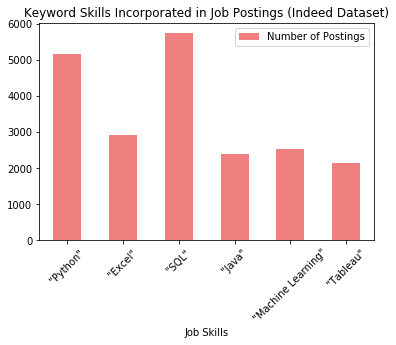

In [89]:
# Combine all the IT dataset skill keyword findings into a bar graph
df = pd.DataFrame({'Job Skills':['"Python"', '"Excel"', '"SQL"', '"Java"', '"Machine Learning"', '"Tableau"'], 
                   'Number of Postings':[indeed_python_vcs, indeed_excel_vcs, indeed_sql_vcs, indeed_java_vcs, 
                                         indeed_ml_vcs, indeed_tableau_vcs]})
df.plot.bar(x='Job Skills', y='Number of Postings', rot=45, color="lightcoral")
plt.title("Keyword Skills Incorporated in Job Postings (Indeed Dataset)")
plt.show
plt.savefig("INDEED_Data__Bars", bbox_inches='tight')

In [112]:
type(indeed_df['Queried_Salary'])

pandas.core.series.Series

In [121]:
# s = indeed_df['Queried_Salary']
# s.replace("<80000", "<80")

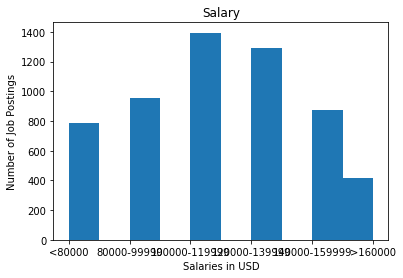

In [125]:
# Construct a histogram from the available salary data in the Indeed dataset to see probable salaries
# as available from the Indeed data set.

plt.hist(indeed_df['Queried_Salary'])
plt.title("Salary")
plt.xlabel('Salaries in USD')
plt.ylabel('Number of Job Postings')
plt.show()

In [ ]:
df1 = pd.DataFrame({'Queried_Salaries' : df.groups.value_counts(sort=False), 'names' : ["<80K", "80-100K", "40-60", "60-80", "80-100", "100-500"]})
df1.plot.bar(x='names', y='count')
<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018CD2808>

plt.hist(indeed_df['Queried_Salary'], rwidth=1, color='#607c8e')
plt.title("Salar")
plt.xlabel('Salaries by $20,000')
plt.ylabel('Number of Job Postings')
plt.show()
>>> plt.show()